In [ ]:
from google.colab import files
import matplotlib.pyplot as plt
from scipy.linalg import circulant
import numpy as np
import time
from sklearn.decomposition import FastICA, PCA
from google.colab import drive
import imageio

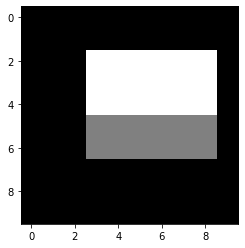

In [ ]:
pic1 = np.zeros((10,10))
pic1[2:7,3:9] = 1

pic1[5:7, 3:9] = 0.5
plt.imshow(pic1,'gray')

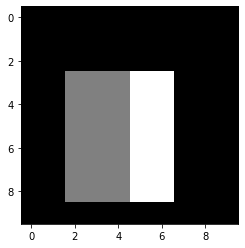

In [ ]:

pic2 = np.zeros((10,10))
pic2[3:9,2:7] = 0.5

pic2[3:9, 5:7] = 1
plt.imshow(pic2,'gray')

In [ ]:
!wget https://raw.githubusercontent.com/yandexdataschool/Practical_DL/35c067adcc1ab364c8803830cdb34d0d50eea37e/week01_backprop/mnist.py -O mnist.py

--2020-06-12 13:33:36--  https://raw.githubusercontent.com/yandexdataschool/Practical_DL/35c067adcc1ab364c8803830cdb34d0d50eea37e/week01_backprop/mnist.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2697 (2.6K) [text/plain]
Saving to: ‘mnist.py’

mnist.py            100%[===================>]   2.63K  --.-KB/s    in 0s      

2020-06-12 13:33:36 (35.3 MB/s) - ‘mnist.py’ saved [2697/2697]



In [ ]:
import mnist

In [ ]:
X_train, y_train, X_val, y_val, X_test, y_test = mnist.load_dataset(flatten=True)

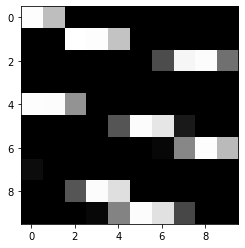

In [ ]:
plt.imshow(X_train[1][400:500].reshape([10,10]),cmap='gray');

In [ ]:
pic1 = X_train[0].reshape([28,28])
pic2 = X_train[1].reshape([28,28])

In [ ]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
files.upload()

Saving n01644900_0.JPEG to n01644900_0.JPEG


{'n01644900_0.JPEG': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x08\x06\x06\x07\x06\x05\x08\x07\x07\x07\t\t\x08\n\x0c\x14\r\x0c\x0b\x0b\x0c\x19\x12\x13\x0f\x14\x1d\x1a\x1f\x1e\x1d\x1a\x1c\x1c $.\' ",#\x1c\x1c(7),01444\x1f\'9=82<.342\xff\xdb\x00C\x01\t\t\t\x0c\x0b\x0c\x18\r\r\x182!\x1c!22222222222222222222222222222222222222222222222222\xff\xc0\x00\x11\x08\x00@\x00@\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\x96\x97\x98\x99\x9a\xa2\xa3\xa4\xa5\xa6\xa7\xa8\xa9\xaa\xb2\xb3\xb4\xb5\xb6\xb7\xb8\xb9\xba\xc2\xc3\xc4\xc5\xc6\xc7\xc8\x

In [ ]:
f = open('/content/drive/My Drive/pim.txt')
pim = f.readline()
pim = pim.split('\t')
pim = np.array(list(map(lambda x: float(x), pim)))
f.close()
f = open('/content/drive/My Drive/nf.txt')
nf = f.readline()
nf = nf.split('\t')
nf = np.array(list(map(lambda x: float(x), nf)))
f.close()
f = open('/content/drive/My Drive/u1.txt')
u1 = f.readline()
u1 = u1.split('\t')
u1 = np.array(list(map(lambda x: float(x), u1)))
f.close()

In [ ]:
K = 10
L = 900
N = 900

In [ ]:
m1 = pim[:N].reshape((N,1))
m2 = u1[:N].reshape((N,1))

In [ ]:

C = np.random.randn(L,N)


h1 = np.random.randn(K,1)
h2 = np.random.randn(K,1)
h3 = np.random.randn(K,1)
h4 = np.random.randn(K,1)

B = np.random.randn(L,K)
#B = np.eye(L,K)
#B2 = np.random.randn(L,K)

In [ ]:
A = circulant(C[:,0]) @ B
for iter in range(1,N):
    elem = circulant(C[:,iter]) @ B
    A = np.hstack((A,elem))
#    print(iter)

In [ ]:
X11 = h1 @ m1.reshape((1,N))
X12 = h2 @ m1.reshape((1,N))

X1 = np.vstack((X11,X12))

X21 = h3 @ m2.reshape((1,N))
X22 = h4 @ m2.reshape((1,N))

X2 = np.vstack((X21,X22))

In [ ]:

X = X1 + X2

In [ ]:
a, b = A.shape
A0 = np.zeros((a,b))
A1 = np.hstack((A,A0))
A2 = np.hstack((A0,A))
A = np.vstack((A1,A2))

In [ ]:
A = np.genfromtxt('/content/drive/My Drive/Anoise.csv', delimiter=',')

In [ ]:
X = np.genfromtxt('/content/drive/My Drive/X.csv', delimiter=',')

In [ ]:

y =  A @ X.reshape((2*N*K,1)) + 40000*nf[:2*L].reshape((2*L,1))

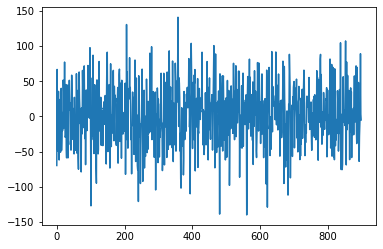

In [ ]:
plt.plot(y[:N])

In [ ]:

def prox_nuclear(A, lambd):
    U, S, Vh = np.linalg.svd(A)
    svp = np.sum(S > lambd)
    if svp >= 1:
        S = S[:svp] - lambd
        X = U[:,:svp] @ np.diag(S) @ Vh[:svp]
        nucnorm = np.sum(S)
    else:
        X = np.zeros(A.shape)
        nucnorm = 0
    return X, nucnorm

In [ ]:
def prox_l21(A,lambd):
    X = np.zeros(A.shape)
    for i in range(X.shape[1]):
        nxi = np.linalg.norm(A[:,i])
        if nxi > lambd:
            X[:,i] = (1 - lambd/nxi) * A[:,i]
    return X
    

In [ ]:


def lrr(y, A, lambd):
    tol = 6e-4
    max_iter = 500
    ro = 1.1
    mu = 1e-4
    max_mu = 1e10

    d, na = y.shape
    a, nb = A.shape
    #X = np.zeros((nb, na))
    X = np.zeros((2*K,N))
    E = np.zeros((d, na))
    J = X

    Y1 = E
    Y2 = X
   
    Ablock = A[:int(a/2),:int(nb/2)]

    AtA = Ablock.T @ Ablock
    Aty = A.T @ y
    I = np.eye(int(nb/2))
    invAtAIblock = np.linalg.inv(AtA + I)
    zeros = np.zeros((int(nb/2),int(nb/2)))
   # print(invAtAIblock.shape, zeros.shape)
    invAtAI = np.vstack((np.hstack((invAtAIblock,zeros)), np.hstack((zeros,invAtAIblock))))
  
    errs = []
    times = []
    start = time.time()

    for iter in range(max_iter):
      

        J, nuclearnormJ = prox_nuclear(X+Y2/mu, 1/mu)
        E = prox_l21(y - A @ X.reshape((2*K*N,1)) + Y1/mu, lambd/mu)

        X = (invAtAI @ ((A.T @ (Y1/mu -E) + Aty).reshape((2*K,N)) - Y2/mu + J).reshape((2*K*N,1))).reshape((2*K,N))
        dY1 = y - A @ X.reshape((2*K*N,1)) - E
        dY2 = X - J

        Y1 += mu * dY1
        Y2 += mu * dY2
        mu = min(ro*mu, max_mu)
        times.append(time.time() - start)
       
        metric = np.linalg.norm(y - A @ X.reshape((2*K*N,1)))
        #print(metric)
        errs.append(metric)
        if metric < tol:
            break
    return J, E, errs, iter, times

In [ ]:
Xk, E, errs, iters, times = lrr(y, A, 0.01)

In [ ]:
u, s, v = np.linalg.svd(Xk)

In [ ]:

s

array([9.06391164e-01, 9.89763649e-02, 6.54325046e-02, 4.25922252e-02,
       4.12944274e-02, 3.37365856e-02, 2.49752177e-02, 2.25180731e-02,
       1.98732398e-02, 1.49742037e-02, 1.26842271e-02, 9.12385495e-03,
       5.07851041e-03, 1.26296487e-03, 2.65034706e-04, 2.18775606e-05,
       7.65562003e-06, 6.15559683e-06, 3.00426210e-06, 2.24945391e-06])

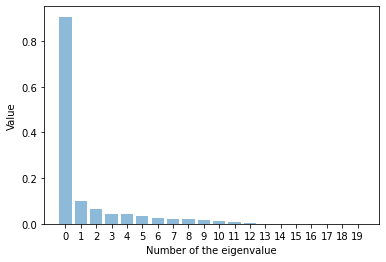

In [ ]:
y_pos = np.arange(len(s))
performance = s

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos)
plt.ylabel('Value')
plt.xlabel('Number of the eigenvalue')

plt.show()

In [ ]:
signal1 = v[0,:]

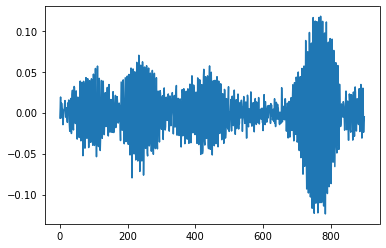

In [ ]:
plt.plot(signal1)

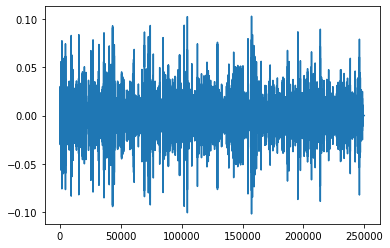

In [ ]:
plt.plot(pim)

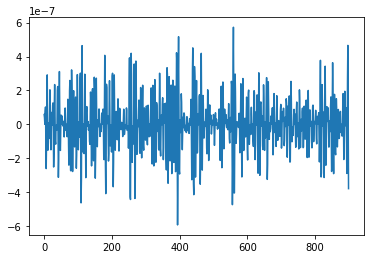

In [ ]:
plt.plot(0.0001*nf[:900])

In [ ]:
signal2 = v[1,:]

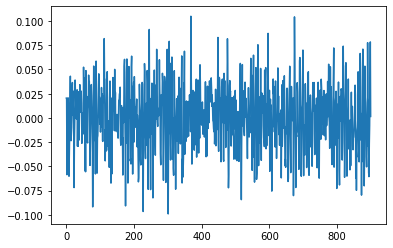

In [ ]:
plt.plot(signal2)

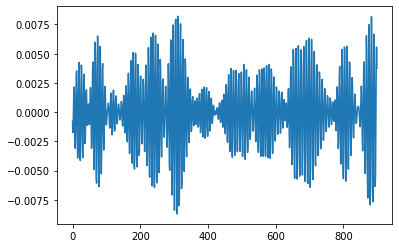

In [ ]:
plt.plot(u1[:900])

In [ ]:
times[-1]

78.54267454147339

In [ ]:
def sae(s1, s2):
    return np.arccos((s1 @ s2) / (np.linalg.norm(s1) * np.linalg.norm(s2))) ** 2

In [ ]:

sae(u1[:900], v[1,:])

0.8910228272004368

In [ ]:

sae(pim[:900], v[0,:])

0.07514775196373703

In [ ]:
np.savetxt("v0.csv", v[0,:], delimiter=",")
#np.savetxt("v1.csv", v[1,:], delimiter=",")

In [ ]:
np.savetxt("A.csv", A, delimiter=",")

In [ ]:
np.savetxt("X.csv", X, delimiter=",")

**channels**

In [ ]:
from google.colab import drive, files
import numpy as np
from scipy.linalg import circulant, block_diag
import time
import matplotlib.pyplot as plt

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
f = open('/content/drive/My Drive/pim.txt')
pim = f.readline()
pim = pim.split('\t')
pim = np.array(list(map(lambda x: float(x), pim)))
f.close()
f = open('/content/drive/My Drive/nf.txt')
nf = f.readline()
nf = nf.split('\t')
nf = np.array(list(map(lambda x: float(x), nf)))
f.close()

In [ ]:
K = 10
L = 784
N = 784

In [ ]:
m = []
for i in range(2500):
    m.append(X_train[i])

In [ ]:


m = []
for i in range (2500):
 
    m.append(pim[i*N:(i+1)*N].reshape((N,1)))

In [ ]:
C = np.random.randn(L,N)
B = np.random.randn(L,K)

In [ ]:
A = circulant(C[:,0]) @ B
for iter in range(1,N):
    elem = circulant(C[:,iter]) @ B
    A = np.hstack((A,elem))

In [ ]:

H = np.zeros((25000,2500))
for i in range(100):
    for j in range(100):
        h = np.random.randn(K,)
        H[i*K:(i+1)*K,j] = h

In [ ]:
def prox_nuclear(A, lambd):
    U, S, Vh = np.linalg.svd(A)
    svp = np.sum(S > lambd)
    if svp >= 1:
        S = S[:svp] - lambd
        X = U[:,:svp] @ np.diag(S) @ Vh[:svp]
        nucnorm = np.sum(S)
    else:
        X = np.zeros(A.shape)
        nucnorm = 0
    return X, nucnorm

In [ ]:
def prox_l21(A,lambd):
    X = np.zeros(A.shape)
    for i in range(X.shape[1]):
        nxi = np.linalg.norm(A[:,i])
        if nxi > lambd:
            X[:,i] = (1 - lambd/nxi) * A[:,i]
    return X

In [ ]:
def lrr(y, A, lambd,p):
    tol = 1e-4
    max_iter = 500
    ro = 1.1
    mu = 1e-4
    max_mu = 1e10

    d, na = y.shape
    a, nb = A.shape
    #X = np.zeros((nb, na))
    X = np.zeros((p*K,N))
    E = np.zeros((d, na))
    J = X

    Y1 = E
    Y2 = X
   
    Ablock = A[:int(a/p),:int(nb/p)]

    AtA = Ablock.T @ Ablock
    Aty = A.T @ y
    I = np.eye(int(nb/p))
    invAtAIblock = np.linalg.inv(AtA + I)
   
    invAtAI = block_diag(invAtAIblock,invAtAIblock)
    for i in range(2,p):
        invAtAI = block_diag(invAtAI,invAtAIblock)
  
    #errs = []
    times = []
    start = time.time()

    for iter in range(max_iter):
      

        J, nuclearnormJ = prox_nuclear(X+Y2/mu, 1/mu)
        E = prox_l21(y - A @ X.reshape((p*K*N,1)) + Y1/mu, lambd/mu)
      #  print(invAtAI.shape, A.T.shape, Y1.shape, E.shape, Aty.shape, Y2.shape, J.shape)
        X = (invAtAI @ ((A.T @ (Y1/mu -E) + Aty).reshape((p*K,N)) - Y2/mu + J).reshape((p*K*N,1))).reshape((p*K,N))
        
        dY1 = y - A @ X.reshape((p*K*N,1)) - E
        dY2 = X - J

        Y1 += mu * dY1
        Y2 += mu * dY2
        mu = min(ro*mu, max_mu)
        times.append(time.time() - start)
       
        metric = np.linalg.norm(y - A @ X.reshape((p*K*N,1)))
        #print(metric)
       # errs.append(metric)
        if metric < tol:
            break
    return J, E,  iter, times

In [ ]:
def sae(s1, s2):
    return min(np.arccos((s1 @ s2) / (np.linalg.norm(s1) * np.linalg.norm(s2))) ** 2, np.arccos((s1 @ -s2) / (np.linalg.norm(s1) * np.linalg.norm(s2))) ** 2)

In [ ]:
#for p in range(2,2500):
p = 6
X = np.zeros((10*p,1))
A0 = A
for i in range(p):
    x0 = H[:K,i].reshape((K,1)) @ m[i].reshape((1,N))
    for j in range(1,p):
        x = H[j*K:(j+1)*K,i].reshape((K,1)) @ m[i].reshape((1,N))  
        x0 = np.vstack((x0,x))               
    X = X + x0
    # print(i)
    if i > 0:
        A0 = block_diag(A0,A)
# print(A0.shape, X.shape)
y =  A0 @ X.reshape((p*N*K,1)) #+ nf[:p*L].reshape((p*L,1))

Xk, E,  iters, times = lrr(y, A0, 0.01, p)

u, s, v = np.linalg.svd(Xk)

name = "vectors" + str(p) + ".csv"
np.savetxt(name, v[:p,:], delimiter=",")
files.download(name)

saes = []
for i in range(p):
    angle = sae(v[i,:], m[i])
    saes.append(angle)
name = "sae" + str(p) + ".csv"
np.savetxt(name, np.array(saes), delimiter=",")
files.download(name)

In [ ]:
saes = []
for i in range(p):
    angle = sae(v[i,:], m[i])
    saes.append(angle)
name = "sae" + str(p) + ".csv"
np.savetxt(name, np.array(saes), delimiter=",")